In [22]:
import numpy as np
import os
import math
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## import seq-borg results

In [23]:
# import results
city = 'Rotterdam'  # ['Rotterdam', 'DenHelder']:
vary_param = 'units'  # ['nodes', 'units']:
algorithm = 'seq_borg_citygraphs'
# algorithm = 'pydsol_borg_citygraphs'
results_seq_borg = pd.read_csv(f'cleaned_data/{algorithm}/df_{city}_{vary_param}_cleaned.csv')

del results_seq_borg['Unnamed: 0']
# results_Rotterdam_nodes = pd.read_csv('cleaned_data/df_Rotterdam_nodes_cleaned.csv')
# results_Rotterdam_units = pd.read_csv('cleaned_data/df_Rotterdam_units_cleaned.csv')
#
# results_DenHelder_nodes = pd.read_csv('cleaned_data/df_Den Helder_nodes_cleaned.csv')
# results_DenHelder_units = pd.read_csv('cleaned_data/df_Den Helder_units_cleaned.csv')

In [24]:
results_seq_borg

,nfe,best_score,elapsed_time,pi_0,pi_1,pi_2,pi_3,pi_4,pi_5,pi_6,...,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,number_of_units,config,seed,improvement,elapsed time (min),scaled score
0,100,0.050,0.251674,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.166667,0.166667,0.166667,957,1,0,0,0.000,0.004195,1.000000
1,401,0.026,0.490865,123.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.336538,0.125000,0.086538,957,1,0,1,0.004,0.008181,0.520000
2,702,0.050,0.776634,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.432692,0.086538,0.096154,957,1,0,1,0.024,0.012944,1.000000
3,100,0.022,0.206723,25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.166667,0.166667,0.166667,957,1,0,1,0.000,0.003445,0.440000
4,551,0.050,0.623870,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.165049,0.165049,0.135922,957,1,0,2,0.024,0.010398,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8310,16285,0.980,19.284506,21.0,51.0,20.0,222.0,39.0,35.0,28.0,...,0.009434,0.009434,0.018868,957,10,9,4,0.002,0.321408,0.981964
8311,22429,0.982,25.856920,21.0,51.0,20.0,222.0,64.0,35.0,28.0,...,0.009434,0.009434,0.009434,957,10,9,4,0.002,0.430949,0.983968
8312,39673,0.984,44.453818,28.0,51.0,20.0,222.0,64.0,35.0,21.0,...,0.009434,0.009434,0.018868,957,10,9,4,0.002,0.740897,0.985972
8313,50330,0.986,56.796995,28.0,49.0,20.0,222.0,51.0,35.0,21.0,...,0.009434,0.009434,0.009434,957,10,9,4,0.002,0.946617,0.987976


In [25]:
for num_units in results_seq_borg[f'number_of_{vary_param}'].unique():
    print(num_units)

1
2
3
4
5
6
7
8
9
10


In [26]:
# # scale score to optimum found with MIP solver
# scaled_result_list = []
# for index, row in results_df.iterrows():
#     score_MIP_at_row = best_solutions_ROT_nodes[row[f'number_of_{vary_param}']][row['config']]
#     scaled_score = row['best_score'] / score_MIP_at_row
#     scaled_result_list.append(scaled_score)
#
# results_df['scaled score'] = scaled_result_list
# results_df

In [27]:
time_of_90_seq_borg = pd.DataFrame(columns=["number_of_units", "time_of_90", "nfe_of_90", "config", "seed"])
time_of_95_seq_borg = pd.DataFrame(columns=["number_of_units", "time_of_95", "nfe_of_95", "config", "seed"])

for num_units in results_seq_borg['number_of_units'].unique():
    for seed in results_seq_borg['seed'].unique():
        for config in results_seq_borg['config'].unique():
            results_subset = results_seq_borg.query(f"config == {config} & seed == {seed} & number_of_units == {num_units}")

            row_of_first_90 = results_subset[results_subset['scaled score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
            row_of_first_95 = results_subset[results_subset['scaled score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
            time_of_90_seq_borg = pd.concat([time_of_90_seq_borg, row_of_first_90], ignore_index=True)
            time_of_95_seq_borg = pd.concat([time_of_95_seq_borg, row_of_first_95], ignore_index=True)

time_of_90_seq_borg['nfe_of_90'] = time_of_90_seq_borg['nfe']
time_of_90_seq_borg['time_of_90'] = time_of_90_seq_borg['elapsed_time']
time_of_95_seq_borg['nfe_of_95'] = time_of_95_seq_borg['nfe']
time_of_95_seq_borg['time_of_95'] = time_of_95_seq_borg['elapsed_time']

time_of_90_seq_borg=time_of_90_seq_borg.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)
time_of_95_seq_borg=time_of_95_seq_borg.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)

time_of_90_seq_borg.insert(1, 'algorithm', 'sequential simulation-optimization, \n metaheuristic')
time_of_95_seq_borg.insert(1, 'algorithm', 'sequential simulation-optimization, \n metaheuristic')

time_of_95_seq_borg

,number_of_units,algorithm,time_of_95,nfe_of_95,config,seed,pi_0,pi_1,pi_2,pi_3,...,pi_8,pi_9,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,elapsed time (min)
0,1,"sequential simulation-optimization, \n metaheu...",0.251674,100.0,0,0,24.0,NaN,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,957.0,0.004195
1,1,"sequential simulation-optimization, \n metaheu...",0.352763,250.0,1,0,13.0,NaN,NaN,NaN,...,NaN,NaN,0.238095,0.276190,0.038095,0.161905,0.228571,0.057143,957.0,0.005879
2,1,"sequential simulation-optimization, \n metaheu...",0.826786,1002.0,2,0,63.0,NaN,NaN,NaN,...,NaN,NaN,0.200000,0.114286,0.057143,0.247619,0.276190,0.104762,957.0,0.013780
3,1,"sequential simulation-optimization, \n metaheu...",0.619437,552.0,3,0,6.0,NaN,NaN,NaN,...,NaN,NaN,0.238095,0.333333,0.114286,0.076190,0.180952,0.057143,957.0,0.010324
4,1,"sequential simulation-optimization, \n metaheu...",0.214033,100.0,4,0,10.0,NaN,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,957.0,0.003567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,10,"sequential simulation-optimization, \n metaheu...",6.180526,5266.0,5,4,50.0,56.0,109.0,164.0,...,2.0,34.0,0.867925,0.009434,0.066038,0.009434,0.009434,0.037736,957.0,0.103009
485,10,"sequential simulation-optimization, \n metaheu...",3.949082,3019.0,6,4,111.0,71.0,14.0,89.0,...,222.0,15.0,0.886792,0.009434,0.009434,0.009434,0.009434,0.075472,957.0,0.065818
486,10,"sequential simulation-optimization, \n metaheu...",7.199832,4860.0,7,4,5.0,55.0,42.0,124.0,...,63.0,8.0,0.943396,0.009434,0.009434,0.009434,0.009434,0.018868,957.0,0.119997
487,10,"sequential simulation-optimization, \n metaheu...",4.940832,3962.0,8,4,25.0,138.0,0.0,64.0,...,60.0,52.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,957.0,0.082347


## import pydsol-borg results

In [28]:
# import results
algorithm = 'pydsol_borg_citygraphs'
results_pydsol_borg = pd.read_csv(f'cleaned_data/{algorithm}/df_{city}_{vary_param}_cleaned.csv')

del results_pydsol_borg['Unnamed: 0']
# results_Rotterdam_nodes = pd.read_csv('cleaned_data/df_Rotterdam_nodes_cleaned.csv')
# results_Rotterdam_units = pd.read_csv('cleaned_data/df_Rotterdam_units_cleaned.csv')
#
# results_DenHelder_nodes = pd.read_csv('cleaned_data/df_Den Helder_nodes_cleaned.csv')
# results_DenHelder_units = pd.read_csv('cleaned_data/df_Den Helder_units_cleaned.csv')

In [29]:
results_pydsol_borg

,nfe,best_score,elapsed_time,pi_0,pi_1,pi_2,pi_3,pi_4,pi_5,pi_6,...,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,number_of_units,config,seed,improvement,elapsed time (min),scaled score
0,1602,0.028,33.653592,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.161905,0.190476,0.076190,957,1,0,0,0.002,0.560893,1.000000
1,100,0.026,2.462861,123.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.166667,0.166667,0.166667,957,1,0,0,0.000,0.041048,0.928571
2,251,0.026,5.635523,123.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.142857,0.180952,0.066667,957,1,0,1,0.006,0.093925,0.928571
3,552,0.028,11.947805,24.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.104762,0.200000,0.057143,957,1,0,1,0.002,0.199130,1.000000
4,100,0.020,2.342643,26.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.166667,0.166667,0.166667,957,1,0,1,0.000,0.039044,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,14918,0.988,358.154727,53.0,12.0,41.0,106.0,47.0,295.0,124.0,...,0.009434,0.009434,0.018868,957,10,9,4,0.002,5.969245,0.991968
8215,18821,0.990,449.624452,53.0,12.0,41.0,148.0,47.0,295.0,124.0,...,0.009434,0.009434,0.009434,957,10,9,4,0.002,7.493741,0.993976
8216,24682,0.992,587.657650,53.0,12.0,41.0,222.0,47.0,288.0,124.0,...,0.009434,0.009434,0.009434,957,10,9,4,0.002,9.794294,0.995984
8217,49902,0.994,1202.613076,53.0,12.0,41.0,222.0,47.0,304.0,127.0,...,0.009434,0.009434,0.009434,957,10,9,4,0.002,20.043551,0.997992


In [30]:
time_of_90_pydsol_borg = pd.DataFrame(columns=["number_of_units", "time_of_90", "nfe_of_90", "config", "seed"])
time_of_95_pydsol_borg = pd.DataFrame(columns=["number_of_units", "time_of_95", "nfe_of_95", "config", "seed"])

for num_units in results_pydsol_borg['number_of_units'].unique():
    for seed in results_pydsol_borg['seed'].unique():
        for config in results_pydsol_borg['config'].unique():
            results_subset = results_pydsol_borg.query(f"config == {config} & seed == {seed} & number_of_units == {num_units}")

            row_of_first_90 = results_subset[results_subset['scaled score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
            row_of_first_95 = results_subset[results_subset['scaled score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
            time_of_90_pydsol_borg = pd.concat([time_of_90_pydsol_borg, row_of_first_90], ignore_index=True)
            time_of_95_pydsol_borg = pd.concat([time_of_95_pydsol_borg, row_of_first_95], ignore_index=True)

time_of_90_pydsol_borg['nfe_of_90'] = time_of_90_pydsol_borg['nfe']
time_of_90_pydsol_borg['time_of_90'] = time_of_90_pydsol_borg['elapsed_time']
time_of_95_pydsol_borg['nfe_of_95'] = time_of_95_pydsol_borg['nfe']
time_of_95_pydsol_borg['time_of_95'] = time_of_95_pydsol_borg['elapsed_time']

time_of_90_pydsol_borg=time_of_90_pydsol_borg.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)
time_of_95_pydsol_borg=time_of_95_pydsol_borg.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)

time_of_90_pydsol_borg.insert(1, 'algorithm', 'simulation model optimization, \n metaheuristic')
time_of_95_pydsol_borg.insert(1, 'algorithm', 'simulation model optimization, \n metaheuristic')

time_of_95_pydsol_borg

,number_of_units,algorithm,time_of_95,nfe_of_95,config,seed,pi_0,pi_1,pi_2,pi_3,...,pi_8,pi_9,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,elapsed time (min)
0,1,"simulation model optimization, \n metaheuristic",33.653592,1602.0,0,0,24.0,NaN,NaN,NaN,...,NaN,NaN,0.142857,0.409524,0.019048,0.161905,0.190476,0.076190,957.0,0.560893
1,1,"simulation model optimization, \n metaheuristic",8.275650,550.0,1,0,13.0,NaN,NaN,NaN,...,NaN,NaN,0.184466,0.339806,0.019417,0.155340,0.262136,0.038835,957.0,0.137927
2,1,"simulation model optimization, \n metaheuristic",6.319309,251.0,2,0,63.0,NaN,NaN,NaN,...,NaN,NaN,0.209524,0.152381,0.114286,0.285714,0.180952,0.057143,957.0,0.105322
3,1,"simulation model optimization, \n metaheuristic",2.381588,100.0,3,0,3.0,NaN,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,957.0,0.039693
4,1,"simulation model optimization, \n metaheuristic",2.316302,100.0,4,0,17.0,NaN,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,957.0,0.038605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,10,"simulation model optimization, \n metaheuristic",117.052504,6208.0,5,4,360.0,302.0,326.0,476.0,...,2.0,110.0,0.943396,0.009434,0.009434,0.009434,0.009434,0.018868,957.0,1.950875
480,10,"simulation model optimization, \n metaheuristic",64.572365,3073.0,6,4,60.0,38.0,14.0,89.0,...,58.0,62.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,957.0,1.076206
481,10,"simulation model optimization, \n metaheuristic",138.298689,6687.0,7,4,153.0,40.0,20.0,75.0,...,139.0,62.0,0.915094,0.018868,0.018868,0.009434,0.009434,0.028302,957.0,2.304978
482,10,"simulation model optimization, \n metaheuristic",62.465487,2786.0,8,4,46.0,134.0,82.0,113.0,...,96.0,11.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,957.0,1.041091


## MIP results

In [31]:
path = "../../HPC_results/seq_mip_citygraphs/units/*.csv"
files = glob.glob(path)

print(files)

['../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U1.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U2.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U3.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U4.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U5.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U6.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U7.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U8.csv', '../../HPC_results/seq_mip_citygraphs/units\\final_solution_T280_N1400_R500_U9.csv']


In [32]:
number_of_nodes_dict = {600: 140,
                        800: 256,
                        1100: 530,
                        1200: 689,
                        1400: 957,
                        1600: 1208,
                        1800: 1541,
                        2000: 1872,
                        2200: 2264,
                        2300: 2514
                        }

In [33]:
results_MIP = pd.DataFrame(columns=["number_of_nodes", "elapsed time", "best score", "config", "seed"])

for file in files:
    results_per_file = pd.DataFrame(columns=["number_of_nodes", "number_of_units", "elapsed time", "best score", "config", "seed"])
    # best score = file content
    imported_df = pd.read_csv(file)

    results_per_file['elapsed time'] = imported_df['elapsed time'].astype(int)
    results_per_file['best score'] = imported_df['score']
    results_per_file['config'] = imported_df['config']
    results_per_file['seed'] = imported_df['seed']

    # extract N from filename using .split()
    split1 = file.replace("\\", "_")
    split2 = split1.replace(".", "_")
    split3 = split2.split("_")

    for seq in split3:
        if "N" in seq:
            _, distance = seq.split("N")
        if "U" in seq:
            _, num_units = seq.split("U")

    results_per_file['number_of_nodes'] = number_of_nodes_dict[int(distance)]
    results_per_file['number_of_units'] = num_units

    # add to dataframe
    results_MIP = pd.concat(
        [results_MIP, pd.DataFrame.from_dict(results_per_file, orient="columns")]
    )

results_MIP['elapsed time (min)'] = results_MIP['elapsed time']/60

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_27200\60760393.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_MIP = pd.concat(


In [34]:
results_MIP

,number_of_nodes,elapsed time,best score,config,seed,number_of_units,elapsed time (min)
0,957,1727,0.476,0,0,1,28.783333
1,957,1769,0.476,0,1,1,29.483333
2,957,1790,0.476,0,2,1,29.833333
3,957,1782,0.476,0,3,1,29.7
4,957,1798,0.476,0,4,1,29.966667
...,...,...,...,...,...,...,...
0,957,4720,1.000,0,0,5,78.666667
0,957,5593,1.000,0,0,6,93.216667
0,957,6398,1.000,0,0,7,106.633333
0,957,7123,1.000,0,0,8,118.716667


In [35]:
seq_time_of_90_df_mip = results_MIP.copy()
seq_time_of_95_df_mip = results_MIP.copy()

seq_time_of_90_df_mip['time_of_90'] = seq_time_of_90_df_mip['elapsed time']
seq_time_of_95_df_mip['time_of_95'] = seq_time_of_95_df_mip['elapsed time']
# seq_time_of_95_df_mip['avg_time_to_95'] = seq_time_of_95_df_mip['elapsed time']

seq_time_of_90_df_mip.insert(1, 'algorithm', 'sequential simulation-optimization, MIP')
seq_time_of_95_df_mip.insert(1, 'algorithm', 'sequential simulation-optimization, MIP')

In [36]:
seq_time_of_95_df_mip

,number_of_nodes,algorithm,elapsed time,best score,config,seed,number_of_units,elapsed time (min),time_of_95
0,957,"sequential simulation-optimization, MIP",1727,0.476,0,0,1,28.783333,1727
1,957,"sequential simulation-optimization, MIP",1769,0.476,0,1,1,29.483333,1769
2,957,"sequential simulation-optimization, MIP",1790,0.476,0,2,1,29.833333,1790
3,957,"sequential simulation-optimization, MIP",1782,0.476,0,3,1,29.7,1782
4,957,"sequential simulation-optimization, MIP",1798,0.476,0,4,1,29.966667,1798
...,...,...,...,...,...,...,...,...,...
0,957,"sequential simulation-optimization, MIP",4720,1.000,0,0,5,78.666667,4720
0,957,"sequential simulation-optimization, MIP",5593,1.000,0,0,6,93.216667,5593
0,957,"sequential simulation-optimization, MIP",6398,1.000,0,0,7,106.633333,6398
0,957,"sequential simulation-optimization, MIP",7123,1.000,0,0,8,118.716667,7123


## plot comparison

In [37]:
combined_results_95_mip = pd.concat([time_of_95_seq_borg, time_of_95_pydsol_borg, seq_time_of_95_df_mip], ignore_index=True)
combined_results_95 = pd.concat([time_of_95_seq_borg, time_of_95_pydsol_borg], ignore_index=True)

In [38]:
combined_results_95

,number_of_units,algorithm,time_of_95,nfe_of_95,config,seed,pi_0,pi_1,pi_2,pi_3,...,pi_8,pi_9,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_nodes,elapsed time (min)
0,1,"sequential simulation-optimization, \n metaheu...",0.251674,100.0,0,0,24.0,NaN,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,957.0,0.004195
1,1,"sequential simulation-optimization, \n metaheu...",0.352763,250.0,1,0,13.0,NaN,NaN,NaN,...,NaN,NaN,0.238095,0.276190,0.038095,0.161905,0.228571,0.057143,957.0,0.005879
2,1,"sequential simulation-optimization, \n metaheu...",0.826786,1002.0,2,0,63.0,NaN,NaN,NaN,...,NaN,NaN,0.200000,0.114286,0.057143,0.247619,0.276190,0.104762,957.0,0.013780
3,1,"sequential simulation-optimization, \n metaheu...",0.619437,552.0,3,0,6.0,NaN,NaN,NaN,...,NaN,NaN,0.238095,0.333333,0.114286,0.076190,0.180952,0.057143,957.0,0.010324
4,1,"sequential simulation-optimization, \n metaheu...",0.214033,100.0,4,0,10.0,NaN,NaN,NaN,...,NaN,NaN,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,957.0,0.003567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,10,"simulation model optimization, \n metaheuristic",117.052504,6208.0,5,4,360.0,302.0,326.0,476.0,...,2.0,110.0,0.943396,0.009434,0.009434,0.009434,0.009434,0.018868,957.0,1.950875
969,10,"simulation model optimization, \n metaheuristic",64.572365,3073.0,6,4,60.0,38.0,14.0,89.0,...,58.0,62.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,957.0,1.076206
970,10,"simulation model optimization, \n metaheuristic",138.298689,6687.0,7,4,153.0,40.0,20.0,75.0,...,139.0,62.0,0.915094,0.018868,0.018868,0.009434,0.009434,0.028302,957.0,2.304978
971,10,"simulation model optimization, \n metaheuristic",62.465487,2786.0,8,4,46.0,134.0,82.0,113.0,...,96.0,11.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,957.0,1.041091


In [39]:
# hue_dict = {'sequential simulation-optimization, metaheuristic': '#b40000',
#             'simulation model optimization, metaheuristic':'#32498d',
#             'sequential simulation-optimization, MIP': 'tab:green'
#             }
hue_dict = {'sequential simulation-optimization, \n metaheuristic': '#b40000',
            'simulation model optimization, \n metaheuristic':'#32498d',
            }

   number_of_units                                          algorithm  \
0                1  sequential simulation-optimization, \n metaheu...   
1                1  sequential simulation-optimization, \n metaheu...   
2                1  sequential simulation-optimization, \n metaheu...   
3                1  sequential simulation-optimization, \n metaheu...   
4                1  sequential simulation-optimization, \n metaheu...   
5                1  sequential simulation-optimization, \n metaheu...   
6                1  sequential simulation-optimization, \n metaheu...   
7                1  sequential simulation-optimization, \n metaheu...   
8                1  sequential simulation-optimization, \n metaheu...   
9                1  sequential simulation-optimization, \n metaheu...   
10               1  sequential simulation-optimization, \n metaheu...   
11               1  sequential simulation-optimization, \n metaheu...   
12               1  sequential simulation-optimizat

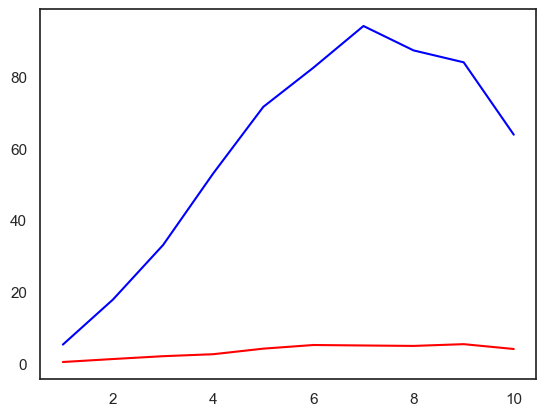

In [40]:
# calculate avg time to convergence
avgs_seq_borg = {}
avgs_pydsol = {}

def avg_time_to_95(df, dict):
    for num_units in df['number_of_units'].unique():
        subset = df.query(f" number_of_units == {num_units}")
        print(subset)
        avg = np.median(subset['time_of_95'])
        dict[num_units] = avg

avg_time_to_95(time_of_95_seq_borg, avgs_seq_borg)
avg_time_to_95(time_of_95_pydsol_borg, avgs_pydsol)

plt.plot(*zip(*sorted(avgs_seq_borg.items())), color='red')
plt.plot(*zip(*sorted(avgs_pydsol.items())), color='blue')

C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

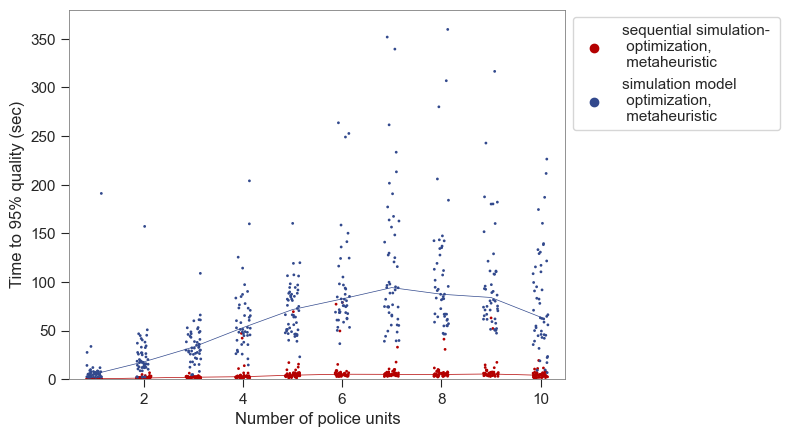

In [41]:
sns.set_style('ticks')

plt.plot(*zip(*sorted(avgs_seq_borg.items())), color='#b40000', linewidth=0.5)
plt.plot(*zip(*sorted(avgs_pydsol.items())), color='#32498d', linewidth=0.5)

ax = sns.stripplot(data=combined_results_95, x='number_of_units', y='time_of_95', hue="algorithm", 
                   palette=hue_dict, size=2, native_scale=True, jitter=0.15)
ax.set(xlabel='Number of police units', ylabel='Time to 95% quality (sec)')

sns.set_context("paper")
sns.set_theme(style='white')
for _,s in ax.spines.items():
    s.set_linewidth(0.6)
    s.set_color('grey')
ax.tick_params(width=0.8)

ax.set_ylim([0, 380])
# ax.set_ylim([0, 8000])
ax.set_xlim([0.5, 10.5])

handles, labels = ax.get_legend_handles_labels()
labels = ['sequential simulation- \n optimization, \n metaheuristic',
          'simulation model \n optimization, \n metaheuristic',
          ]
ax.legend(handles=handles, labels=labels, loc='upper left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('figs/Rotterdam_stripplot_units.png', dpi=400, bbox_inches='tight')
plt.show()